In [19]:
import matplotlib.pylab as plt
import scipy.sparse as sps
import scipy.linalg as linalg

# Linear systems

* Doolittle algorithm
* Solving linear systems using LU decomposition

## Doolittle algorithm

This gives $N^2$ equations for $N^2+N$ unknowns (the decomposition is not unique), and can be solved using Crout's method. To solve the matrix equation
$$Ax=(LU)x=L(Ux)=b,$$ 	
first solve $Ly=b$ for $y$. This can be done by forward substitution
$$y_1	=	(b_{1})/(l_{11})$$	
$$y_i	=	1/(l_{ii})(b_i-\sum_{j=1}^{i-1}l_{ij}y_j)$$	
for $i=2, \ldots, N.$ Then solve $Ux=y$ for $x$. This can be done by back substitution
$$x_N	=	(y_N)/(u_{NN})$$	
$$x_i	=	1/(u_{ii})(y_i-\sum_{j=i+1}^{N}u_{ij}x_j)$$	
for $i=N-1, \ldots, 1$.

In [20]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])

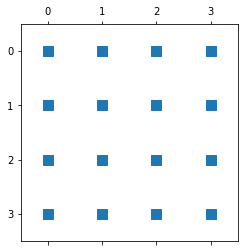

In [21]:
M = sps.csr_matrix(A)
plt.spy(M)
plt.show()

In [22]:
P, L, U = linalg.lu(A)

Text(0.5, 1.05, 'U')

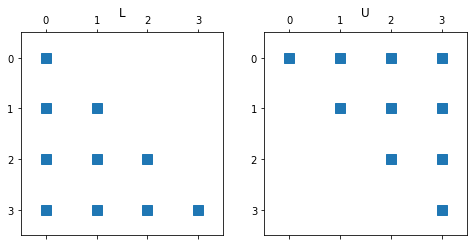

In [23]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.spy(sps.csr_matrix(L))
plt.title('L')
plt.subplot(122)
plt.spy(sps.csr_matrix(U))
plt.title('U')

## LU decomposition

Let's solve the following linear system $Ax=b$ for $x$ where

$$A=\left[\begin{array}{cccc} 2 & 1 & 1 & 0\\ 1 & -2 & 0 & 1\\ 0 & 1 & 3 & 0\\ -1 & 0 & 0 & 4 \end{array}\right],$$
and
$$b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].$$
First, we can decompose matrix A using LU method. We have

In [40]:
A = np.array([[2,1,1,0],[1,-2,0,1],[0,1,3,0],[-1,0,0,4]])
b = np.array([[7],[1],[11],[15]])
P, L, U = linalg.lu(A)

In [41]:
L, U

(array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.5       ,  1.        ,  0.        ,  0.        ],
        [ 0.        , -0.4       ,  1.        ,  0.        ],
        [-0.5       , -0.2       ,  0.14285714,  1.        ]]),
 array([[ 2.        ,  1.        ,  1.        ,  0.        ],
        [ 0.        , -2.5       , -0.5       ,  1.        ],
        [ 0.        ,  0.        ,  2.8       ,  0.4       ],
        [ 0.        ,  0.        ,  0.        ,  4.14285714]]))

Now we can solve the following linear systems instead
$$\begin{cases}
Ly=b,\\
Ux=y.
\end{cases}$$

In [42]:
# solving Ly=b for y
y = linalg.solve(L, b)
y

array([[ 7.        ],
       [-2.5       ],
       [10.        ],
       [16.57142857]])

In [43]:
# solving Ux=y for x
x = linalg.solve(U, y)
x

array([[1.],
       [2.],
       [3.],
       [4.]])

Let's now solve the linear system directly and compare the results.

In [44]:
x1 = linalg.solve(A, b)
x1

array([[1.],
       [2.],
       [3.],
       [4.]])